In [1]:
import pandas as pd
import numpy as np
import os
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier <- pip install xgboost
from sklearn.svm import SVC
from sklearn.svm import SVR # Support Vector Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline

In [2]:
data=pd.read_csv('C:/Users/User/machine_learning/data/btc_data.csv')
data.head(5)

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
data.dtypes

Date              object
priceUSD         float64
transactions       int64
size             float64
sentbyaddress      int64
                  ...   
price3rocUSD     float64
price7rocUSD     float64
price14rocUSD    float64
price30rocUSD    float64
price90rocUSD    float64
Length: 737, dtype: object

In [4]:
data.isna().sum()

Date             0
priceUSD         0
transactions     0
size             0
sentbyaddress    0
                ..
price3rocUSD     0
price7rocUSD     0
price14rocUSD    0
price30rocUSD    0
price90rocUSD    0
Length: 737, dtype: int64

In [5]:
data.fillna(0, inplace=True)

In [6]:
data.describe()
data.columns

Index(['Date', 'priceUSD', 'transactions', 'size', 'sentbyaddress',
       'difficulty', 'hashrate', 'mining_profitability', 'sentinusdUSD',
       'transactionfeesUSD',
       ...
       'price3rsiUSD', 'price7rsiUSD', 'price14rsiUSD', 'price30rsiUSD',
       'price90rsiUSD', 'price3rocUSD', 'price7rocUSD', 'price14rocUSD',
       'price30rocUSD', 'price90rocUSD'],
      dtype='object', length=737)

days = []
j = 1
for j in range(len(data)):
    days.append([int(j+1)])
    j=j+1
print(days)

In [8]:
price = data.priceUSD * 10000
print(price)

0            495.0
1            726.0
2            859.0
3            783.0
4            767.0
           ...    
3483    93490000.0
3484    93940000.0
3485    93660000.0
3486    93930000.0
3487    93980000.0
Name: priceUSD, Length: 3488, dtype: float64


In [9]:
price = price.astype(np.int64)
print(price)

0            495
1            726
2            859
3            783
4            767
          ...   
3483    93490000
3484    93940000
3485    93660000
3486    93930000
3487    93980000
Name: priceUSD, Length: 3488, dtype: int64


In [10]:
test = days[:-1]
test_p = price[:-1]
lin_svr = SVR(kernel = 'linear', C = 1000)
lin_svr.fit(test, test_p)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
poly_svr = SVR(kernel = 'poly', C = 1000, degree=2)
poly_svr.fit(test, test_p)


SVR(C=1000, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
day = [[len(days)]]
print('The Poly SVR Predicted Price :', poly_svr.predict(day))
print('The Linear SVR Predicted Price :', lin_svr.predict(day))

seq_len = 2250

The Poly SVR Predicted Price : [44641998.51881681]
The Linear SVR Predicted Price : [42779637.58313319]


svc = SVC()
svc.fit(test, test_p)

print("훈련 세트 정확도: {:.3f}".format(svc.score(test, test_p)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(test, test_p)))

pred = svc.predict(test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(test_p, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [32]:
seq_days = []
seq_prices = []
pre_prices = []
j = 1
for j in range(len(data) - seq_len-1):
    temp_days = []
    seq_prices.append(price[j:j+seq_len])
    pre_prices.append(price[j+seq_len+1])
    for i in range(seq_len):
        temp_days.append(j+i+1)
    seq_days.append(temp_days)
    j=j+1
print(seq_prices)
print(pre_prices)

[0           495
1           726
2           859
3           783
4           767
         ...   
2245    6212850
2246    6226029
2247    6239020
2248    6203060
2249    6072250
Name: priceUSD, Length: 2250, dtype: int64, 1           726
2           859
3           783
4           767
5           649
         ...   
2246    6226029
2247    6239020
2248    6203060
2249    6072250
2250    6091260
Name: priceUSD, Length: 2250, dtype: int64, 2           859
3           783
4           767
5           649
6           566
         ...   
2247    6239020
2248    6203060
2249    6072250
2250    6091260
2251    6104470
Name: priceUSD, Length: 2250, dtype: int64, 3           783
4           767
5           649
6           566
7           581
         ...   
2248    6203060
2249    6072250
2250    6091260
2251    6104470
2252    6097060
Name: priceUSD, Length: 2250, dtype: int64, 4           767
5           649
6           566
7           581
8           530
         ...   
2249    6072250
2250   

In [33]:
print(seq_days)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



svc = SVC()
svc.fit(seq_prices, pre_prices)

print("훈련 세트 정확도: {:.3f}".format(svc.score(seq_prices, pre_prices)))

pred = svc.predict(seq_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

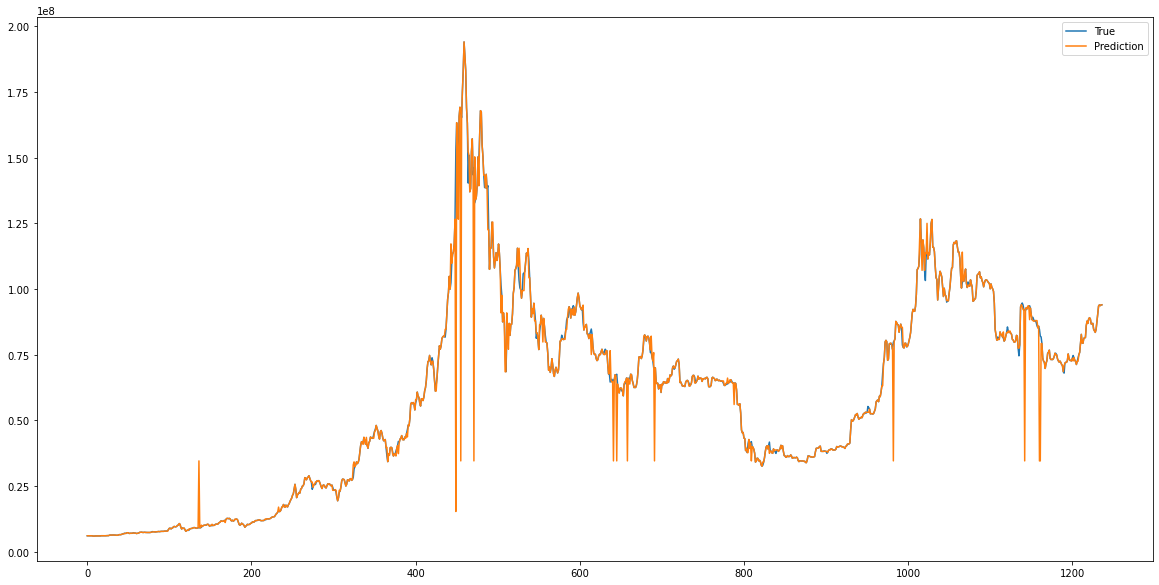

In [34]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=300) 
rfc.fit(seq_prices, pre_prices)

pred = rfc.predict(seq_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [35]:
print("훈련 세트 정확도: {:.3f}".format(rfc.score(seq_prices, pre_prices)))

훈련 세트 정확도: 0.861


GBC = GradientBoostingClassifier(max_depth=10, n_estimators=100, learning_rate=0.1, random_state=42)
GBC.fit(seq_prices, pre_prices)
pred = GBC.predict(seq_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

print("훈련 세트 정확도: {:.3f}".format(GBC.score(seq_prices, pre_prices)))

In [36]:
print(pred)

[ 6104470  6097060  6083480 ... 93660000 93930000 93980000]


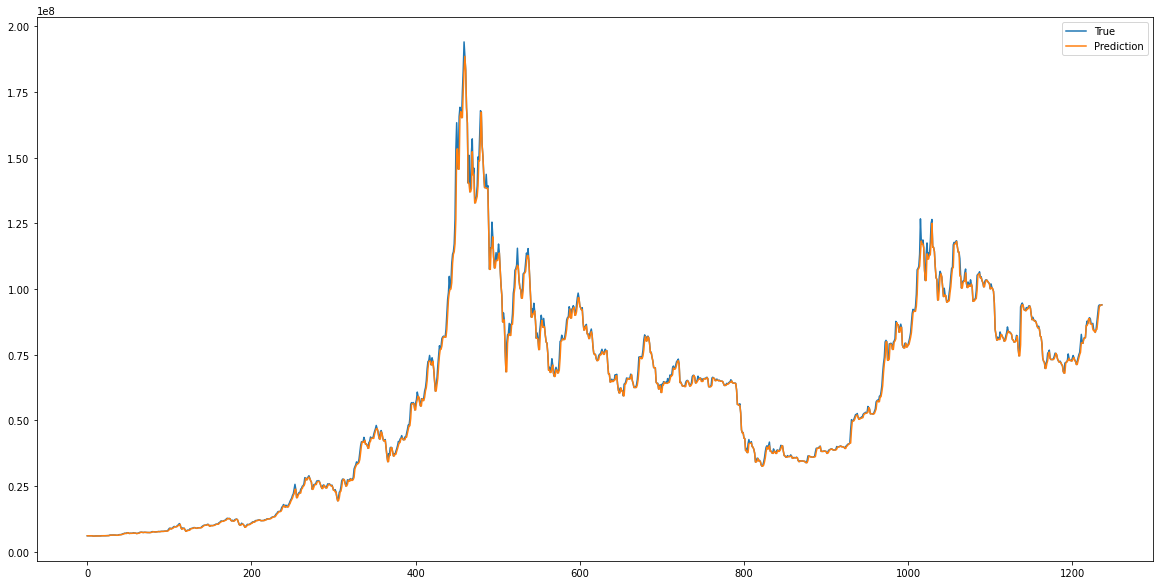

In [37]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(seq_prices, pre_prices)

pred = knn.predict(seq_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [38]:
print("훈련 세트 정확도: {:.3f}".format(knn.score(seq_prices, pre_prices)))

훈련 세트 정확도: 0.460


In [39]:
test_data=pd.read_csv('C:/Users/User/machine_learning/data/btc_testdata.csv')

In [40]:
test_data.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,03-Feb-20,9344.68,9540.37,9248.63,9293.52,3.093410e+10,1.691269e+11
1,04-Feb-20,9292.84,9331.27,9112.81,9180.96,2.989318e+10,1.670936e+11
2,05-Feb-20,9183.42,9701.30,9163.70,9613.42,3.522206e+10,1.749834e+11
3,06-Feb-20,9617.82,9824.62,9539.82,9729.80,3.762882e+10,1.771183e+11
4,07-Feb-20,9726.00,9834.72,9726.00,9795.94,3.452272e+10,1.783394e+11


In [41]:
test_prices = (test_data['High']+test_data['Low'])/2

In [42]:
test_prices = test_prices * 10000
print(test_prices)

0       93945000.0
1       92220400.0
2       94325000.0
3       96822200.0
4       97803600.0
          ...     
465    491554300.0
466    501533500.0
467    486519050.0
468    468416950.0
469    444154250.0
Length: 470, dtype: float64


In [43]:
test_prices = test_prices.astype(np.int64)
print(test_prices)
print(test_prices[1])

0       93945000
1       92220400
2       94325000
3       96822200
4       97803600
         ...    
465    491554299
466    501533500
467    486519050
468    468416950
469    444154250
Length: 470, dtype: int64
92220400


In [44]:
seq_test_prices = []
pre_test_prices = []
j = 1
for j in range(len(test_data)):
    temp_price = []
    temp_price.extend(price[j-seq_len:])        
    temp_price.extend(test_prices[:j])
    seq_test_prices.append(temp_price)
    pre_test_prices.append(test_prices[j])
    j=j+1
print(seq_test_prices)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
print(seq_test_prices[0])

[9162650, 7207150, 7335480, 8563340, 9168190, 8876970, 8536210, 8701340, 8547840, 8345100, 7744160, 6730010, 5545220, 6159880, 6635290, 6142910, 6348180, 6500850, 6707279, 6703940, 7304490, 7530549, 7381250, 7297590, 7607190, 7566140, 7711440, 7797730, 7936290, 8346900, 8776850, 9617170, 9148100, 8483310, 8498400, 8462200, 8994760, 8938780, 8374150, 8443300, 8578060, 8541080, 8227100, 8369050, 8422930, 8860570, 8630390, 8524480, 8378970, 8081570, 8294460, 8611600, 8590500, 7982130, 8255510, 8126480, 8245420, 8385700, 8356890, 8169340, 8176920, 8302980, 8003370, 7279010, 6966609, 6762290, 6596820, 6614330, 6340910, 5749500, 5475190, 5879080, 6339990, 6302880, 6282320, 6224090, 5976130, 5650810, 5783049, 6185230, 5703450, 4998000, 5729990, 5803750, 5676570, 5600830, 5610900, 6048070, 6776060, 6620019, 6613529, 6421849, 6196770, 6274790, 6303010, 6259270, 6369840, 6387900, 6329240, 6314640, 6316480, 6250260, 6135110, 6137830, 5960090, 5822310, 5633480, 5643720, 5636410, 5778540, 5795820, 

In [46]:
print(price)
print(test_prices)
print(pre_test_prices)

0            495
1            726
2            859
3            783
4            767
          ...   
3483    93490000
3484    93940000
3485    93660000
3486    93930000
3487    93980000
Name: priceUSD, Length: 3488, dtype: int64
0       93945000
1       92220400
2       94325000
3       96822200
4       97803600
         ...    
465    491554299
466    501533500
467    486519050
468    468416950
469    444154250
Length: 470, dtype: int64
[93945000, 92220400, 94325000, 96822200, 97803600, 97778300, 99899150, 99751650, 99696899, 102980000, 102868950, 102237650, 101079949, 98881800, 97232300, 98971600, 99014500, 95755600, 96563750, 96494800, 97975950, 97443950, 94788800, 90296050, 87550450, 86916950, 86875700, 85990049, 87269700, 88032950, 87779000, 89496500, 90998900, 90269800, 85097950, 79339450, 79758550, 77968100, 63947350, 49725450, 53751500, 55029650, 49802950, 51766300, 52005850, 57833549, 63550200, 61554799, 60917050, 61144650, 66000450, 67147200, 66632100, 66302700, 62926700, 60

for k in range(len(seq_test_prices)):
    print(len(seq_test_prices[k]))

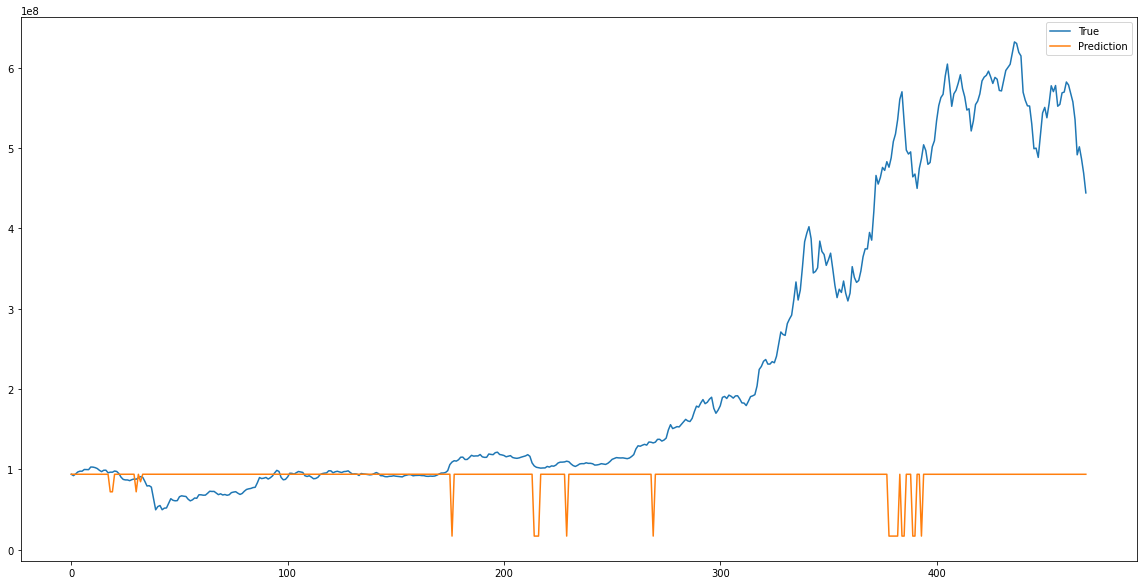

In [47]:
pred = rfc.predict(seq_test_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(pre_test_prices, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [48]:
print("테스트 세트 정확도: {:.3f}".format(rfc.score(seq_test_prices, pre_test_prices)))

테스트 세트 정확도: 0.000


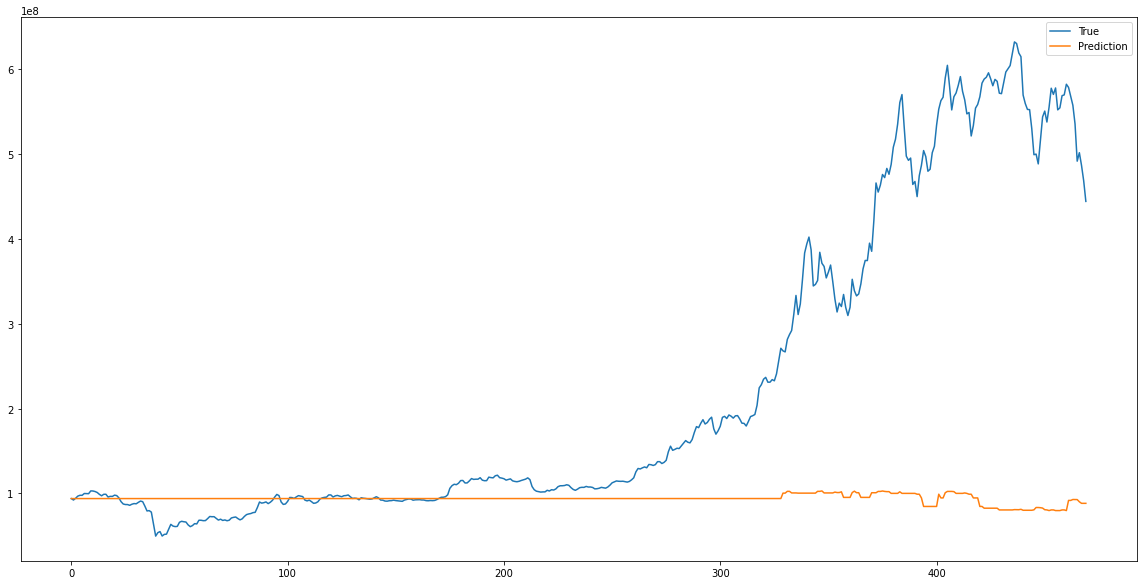

In [49]:
pred = knn.predict(seq_test_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(pre_test_prices, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [50]:
svc = SVC(C=10000)
svc.fit(seq_prices, pre_prices)
svc.score(seq_test_prices, pre_test_prices)

0.0

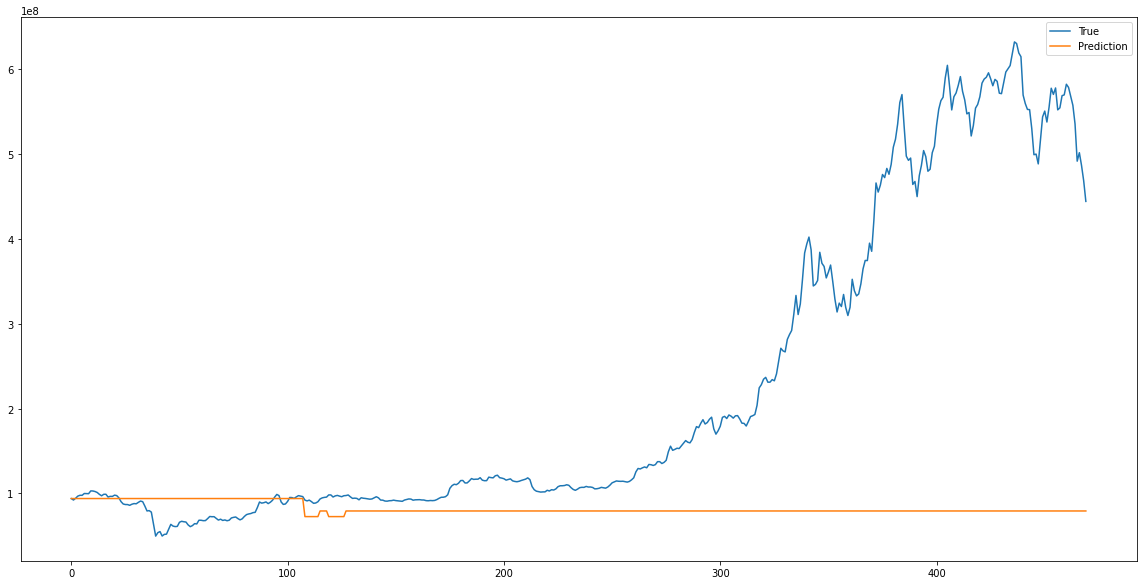

In [51]:
pred = svc.predict(seq_test_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(pre_test_prices, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()